# Adaptive Metropolis-Hastings example


### Load libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'library')))

from mcmc_utils import target_distribution
from mcmc_algorithms import adaptive_metropolis_hastings

### Run the model

In [22]:
# Parameters
initial_value = 0.0
num_iterations = 100000
burn_in = 10000
thin = 1
seed = 42
credible_interval = 0.95

# AMH specific parameters
initial_variance = 1.0
check_interval = 100
increase_factor = 1.1
decrease_factor = 0.9

# Define a custom target distribution using a mathematical expression
expression = '0.3 * exp(-0.5 * x**2) / sqrt(2 * pi) + 0.7 * exp(-0.5 * (x - 9)**2) / sqrt(2 * pi)'

# Create the target distribution function with a custom expression
target_dist_custom = target_distribution(expression)

# Run sampler with custom distribution
samples_custom, elapsed_time, acceptance_rate, acceptance_rates, mean, median, ci = (
    adaptive_metropolis_hastings(
        target_dist_custom,
        initial_value,
        num_iterations,
        initial_variance=initial_variance,
        check_interval=check_interval,
        increase_factor=increase_factor,
        decrease_factor=decrease_factor,
        burn_in=burn_in,
        thin=thin,
        seed=seed,
        credible_interval=credible_interval
    )
)

Sampling: 100%|██████████| 110000/110000 [00:52<00:00, 2083.09iteration/s, acceptance_rate=0]     


### Summary

In [23]:
# Display results for custom distribution
print(f"Custom distribution statistics:")
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Final acceptance rate: {acceptance_rate:.2%}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"{credible_interval*100:.0f}% Credible Interval: ({ci[0]:.4f}, {ci[1]:.4f})")


Custom distribution statistics:
Time taken: 52.81 seconds
Final acceptance rate: 40.81%
Mean: 6.2259
Median: 8.4176
95% Credible Interval: (-1.4200, 10.8093)


### Plots

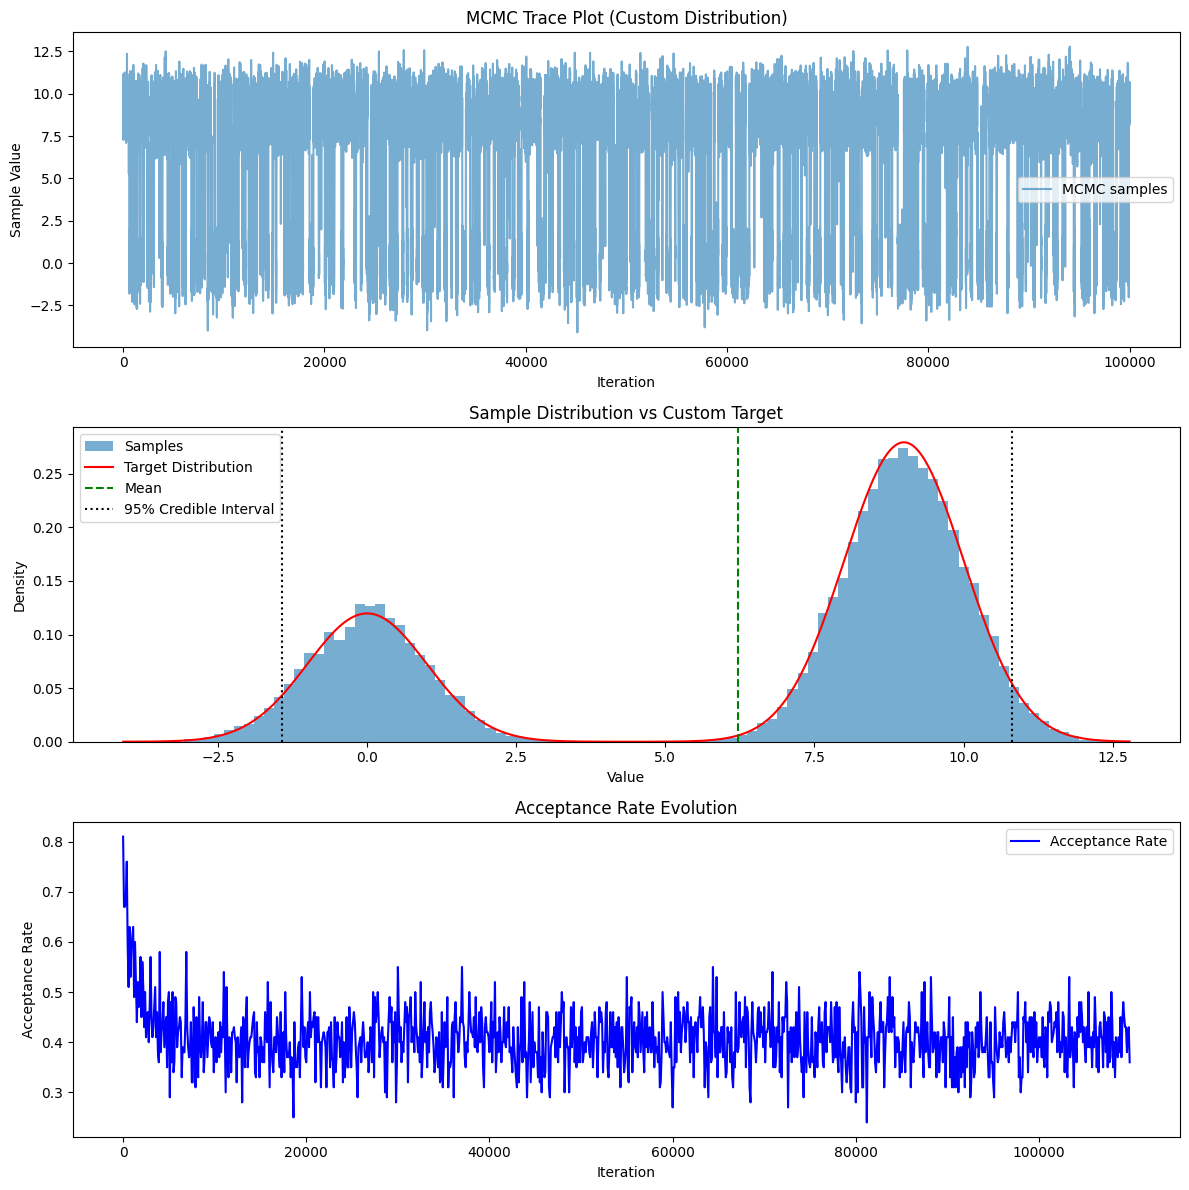

In [24]:
# Plot custom distribution results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

ax1.plot(samples_custom, alpha=0.6, label='MCMC samples')
ax1.set_title('MCMC Trace Plot (Custom Distribution)')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')
ax1.legend()

x = np.linspace(min(samples_custom), max(samples_custom), 1000)
target_values = [target_dist_custom(xi) for xi in x]

ax2.hist(samples_custom, bins=100, density=True, alpha=0.6, label='Samples')
ax2.plot(x, target_values, 'r-', label='Target Distribution')
ax2.axvline(mean, color='g', linestyle='--', label='Mean')
ax2.axvline(ci[0], color='k', linestyle=':', 
            label=f'{credible_interval*100:.0f}% Credible Interval')
ax2.axvline(ci[1], color='k', linestyle=':')
ax2.set_title('Sample Distribution vs Custom Target')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

ax3.plot(np.arange(len(acceptance_rates)) * check_interval, 
         acceptance_rates, 'b-', label='Acceptance Rate')
ax3.set_title('Acceptance Rate Evolution')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Acceptance Rate')
ax3.legend()

plt.tight_layout()
plt.show()